Goal: Analyze trend and pattern of CO2 and greenhouse gas emission\
- trend emission vs time by country
- which continent released these gas the most
- time vs world avg temp
- percent share of emission in the world?
- what source is the most share in emission?
- increasing in gdp or population affect gas emission?
- whats about thailand?

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)  # Set 'None' to display all rows
pd.set_option('display.max_columns', None)  # Set 'None' to display all columns

df = pd.read_csv("/content/owid-co2-data.csv")
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,0.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,0.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111,NaN,NaN,NaN,NaN,0.110,NaN,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.109,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.107,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,0.106,NaN,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

## Some country has no iso_code. Lets deep down...
Its seem like continent and world data

In [ ]:
for c in df[df['iso_code'].isnull()]['country'].unique():
  print("{} rows of {} ".format(len(df[df['country'] == c]),c))

273 rows of Africa 
173 rows of Africa (GCP) 
273 rows of Asia 
173 rows of Asia (GCP) 
273 rows of Asia (excl. China and India) 
173 rows of Central America (GCP) 
273 rows of Europe 
173 rows of Europe (GCP) 
273 rows of Europe (excl. EU-27) 
273 rows of Europe (excl. EU-28) 
231 rows of European Union (27) 
273 rows of European Union (28) 
171 rows of French Equatorial Africa (Jones et al. 2023) 
171 rows of French West Africa (Jones et al. 2023) 
273 rows of High-income countries 
73 rows of International aviation 
73 rows of International shipping 
172 rows of International transport 
172 rows of Kosovo 
1 rows of Kuwaiti Oil Fires (GCP) 
171 rows of Kuwaiti Oil Fires (Jones et al. 2023) 
171 rows of Least developed countries (Jones et al. 2023) 
7 rows of Leeward Islands (GCP) 
171 rows of Leeward Islands (Jones et al. 2023) 
273 rows of Low-income countries 
273 rows of Lower-middle-income countries 
173 rows of Middle East (GCP) 
173 rows of Non-OECD (GCP) 
273 rows of North Am

In [ ]:
condition = df['iso_code'].isnull()
continent_df = df[condition]
df = df[~condition]
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,0.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,0.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111,NaN,NaN,NaN,NaN,0.110,NaN,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.109,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.107,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,0.106,NaN,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,39717.000000,3.674600e+04,1.454800e+04,19358.000000,18425.000000,23865.000000,23547.000000,21432.000000,20413.000000,20140.000000,20429.000000,20413.000000,13156.000000,8638.000000,22799.000000,13508.000000,9257.000000,21272.000000,21076.000000,3820.000000,3820.000000,3429.000000,19358.000000,23865.000000,20413.000000,21272.000000,21334.000000,21357.000000,34081.000000,21358.000000,1634.00000,9367.000000,7151.000000,21334.000000,21093.000000,21357.000000,21116.000000,5982.000000,5982.000000,34081.000000,33372.000000,5983.000000,5983.000000,5983.000000,5983.000000,21358.000000,21117.000000,1634.000000,1634.000000,9409.000000,17643.000000,23865.000000,20413.000000,21272.000000,17643.000000,23865.000000,20413.000000,21272.000000,14727.000000,19629.000000,34081.000000,20616.000000,1634.000000,14727.000000,19629.000000,34081.000000,20616.000000,1634.000000,36936.000000,34371.000000,36936.000000,36936.000000,34371.000000,5982.000000,5982.000000,3820.000000,3819.000000
mean,1929.995871,1.482078e+07,2.255428e+11,2.409284,0.071197,72.441226,1.529840,21.329828,130.017889,1.751714,5.286317,7.152349,1.984973,1.152809,3.883496,0.380552,0.229551,38.505215,1.022194,234.341456,6.419019,0.363313,54.936049,2732.430049,6504.003076,1815.068750,27.024124,304.416598,2477.906639,854.168255,131.21584,24523.492328,1.809983,0.908196,0.181488,12.257067,0.560578,6.784436,7.644559,31.280075,4.302417,39.300548,1.925931,13.932982,0.561584,26.779040,2.361820,0.088360,6.114936,612.231616,0.810484,1.135503,0.860044,1.283342,0.808732,1.138329,0.810692,1.282574,0.495688,0.718321,0.681198,0.796122,7.282741,0.495690,0.718326,0.672641,0.788846,7.282753,0.461734,0.000602,0.001414,0.002122,0.000077,203.265100,194.694634,0.047724,24.419931
std,56.214783,7.108675e+07,9.384294e+11,22.996496,0.132906,415.717506,21.832759,735.319572,510.101794,40.926250,266.741111,10.663981,4.053670,5.329708,15.362044,0.516981,0.199348,253.569071,2.284562,812.617879,7.070955,0.277819,372.415979,17070.445287,28390.244646,9988.396187,136.085715,2737.333907,10486.502810,5937.695046,453.54445,32515.985910,1.781318,4.515045,2.481842,76.828462,2.471146,7.444970,8.400629,128.453273,9.474450,110.950914,2.902558,42.091791,0.750369,140.684512,15.100429,0.058802,18.572046,2541.555546,5.693685,6.846055,3.141201,7.297895,5.555614,7.337705,3.221242,7.750019,2.697458,6.85556

In [ ]:
consumption_based_filter = ['country', 'year','iso_code', 'population', 'gdp',
                     'primary_energy_consumption','consumption_co2', 'consumption_co2_per_capita',
                     'consumption_co2_per_gdp','trade_co2','trade_co2_share']

cumulative_filter = ['co2_growth_abs','co2_growth_prct','co2_including_luc_growth_abs','co2_including_luc_growth_prct','cumulative_cement_co2','cumulative_co2','cumulative_co2_including_luc','cumulative_coal_co2',
              'cumulative_flaring_co2','cumulative_gas_co2','cumulative_luc_co2','cumulative_oil_co2','cumulative_other_co2']

share_filter = ['share_global_cement_co2','share_global_co2','share_global_co2_including_luc','share_global_coal_co2',
          'share_global_cumulative_cement_co2','share_global_cumulative_co2','share_global_cumulative_co2_including_luc',
          'share_global_cumulative_coal_co2','share_global_cumulative_flaring_co2','share_global_cumulative_gas_co2',
          'share_global_cumulative_luc_co2','share_global_cumulative_oil_co2','share_global_cumulative_other_co2',
          'share_global_flaring_co2','share_global_gas_co2','share_global_luc_co2','share_global_oil_co2',
          'share_global_other_co2','share_of_temperature_change_from_ghg']

temp = ['temperature_change_from_ch4', 'temperature_change_from_co2',
       'temperature_change_from_ghg', 'temperature_change_from_n2o']

territorial_filter = list(set(df.columns.tolist()) - set(consumption_based_filter) - set(cumulative_filter) - set(share_filter) - set(temp))
territorial_filter  = ['country', 'year','iso_code', 'population', 'gdp'] + territorial_filter

## Missing Value

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = (df.isnull().sum(axis=0) * 100/df.shape[0]).sort_values(ascending=False)

Text(0, 0.5, 'Frequency')

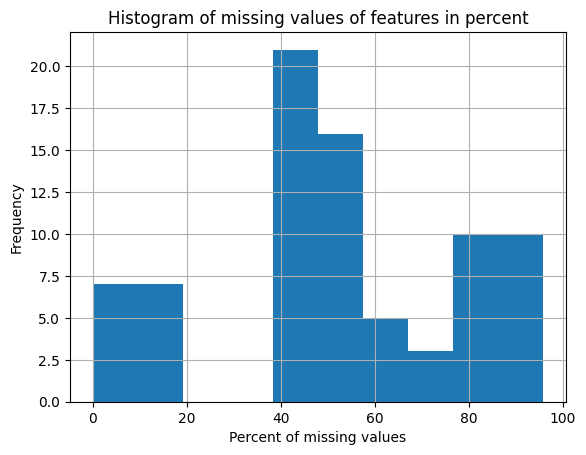

In [ ]:
missing_values.hist()
plt.title("Histogram of missing values of features in percent")
plt.xlabel("Percent of missing values")
plt.ylabel("Frequency")

In [ ]:
print("Number of columns that has more than 30 percent of missing values : {}".format((missing_values > 30).sum()))

Number of columns that has more than 30 percent of missing values : 65


# Data cleaning

In [ ]:
year = [1800,1850,1900,1950,1990]
for y in year:
  null_count = df[df['year'] >= y].isna().sum().sum()
  percent = null_count*100/(df.shape[0]*df.shape[1])
  print('Year >= {} : has {} null values as {:.2f} percent of all data.'.format(y, null_count, percent))

Year >= 1800 : has 1618059 null values as 51.57 percent of all data.
Year >= 1850 : has 1549986 null values as 49.40 percent of all data.
Year >= 1900 : has 904355 null values as 28.82 percent of all data.
Year >= 1950 : has 336343 null values as 10.72 percent of all data.
Year >= 1990 : has 89018 null values as 2.84 percent of all data.


## data in year less than 1990 has too many null values and uninformative for our works so i accept 5 percent of missing values for futher analysis

In [ ]:
filter_df = ['country','year','gdp','cement_co2','co2','coal_co2','consumption_co2',
             'flaring_co2','gas_co2','land_use_change_co2','methane','nitrous_oxide','oil_co2','other_industry_co2',
             'primary_energy_consumption','temperature_change_from_ch4','temperature_change_from_co2','temperature_change_from_ghg',
             'temperature_change_from_n2o','trade_co2','trade_co2_share','total_ghg_excluding_lucf']

df = df[df['year'] >= 1990]
continent_df = continent_df[continent_df['year'] >= 1990]
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
140,Afghanistan,1990,AFG,10694804.0,1.306598e+10,0.046,0.004,2.024,-0.741,-26.784,2.213,-1.495,-40.312,0.207,0.169,0.070,0.189,0.155,0.064,0.278,0.026,NaN,NaN,NaN,1.537,58.603,355.083,11.510,5.710,10.814,807.556,29.032,NaN,2968.316,2.430,0.026,0.002,0.403,0.038,1.087,0.864,0.189,0.018,6.74,0.630,2.84,0.266,1.271,0.119,NaN,NaN,31.746,0.009,0.009,0.008,0.003,0.013,0.007,0.025,0.003,0.070,0.014,0.127,0.011,NaN,0.010,0.011,0.004,0.014,NaN,0.093,0.0,0.0,0.001,0.0,9.24,11.63,NaN,NaN
141,Afghanistan,1991,AFG,10745168.0,1.204736e+10,0.046,0.004,1.914,-0.110,-5.435,1.938,-0.276,-12.451,0.180,0.161,0.139,0.178,0.159,0.138,0.250,0.023,NaN,NaN,NaN,1.582,60.518,357.021,11.760,5.736,11.203,807.579,30.237,NaN,1293.862,1.154,0.026,0.002,0.389,0.036,1.107,0.885,0.023,0.002,7.02,0.653,2.93,0.273,1.204,0.112,NaN,NaN,13.903,0.009,0.008,0.007,0.003,0.012,0.007,0.024,0.003,0.068,0.013,0.126,0.011,NaN,0.009,0.010,0.000,0.012,NaN,0.091,0.0,0.0,0.001,0.0,9.51,11.90,NaN,NaN
142,Afghanistan,1992,AFG,12057436.0,1.267754e+10,0.046,0.004,1.482,-0.432,-22.580,-0.158,-2.095,-108.141,-0.013,-0.012,-0.017,0.123,0.117,0.162,0.022,0.002,NaN,NaN,NaN,1.628,62.000,356.863,11.782,5.758,11.566,805.939,31.266,NaN,760.342,0.723,0.022,0.002,0.363,0.030,0.958,0.760,-1.640,-0.136,7.12,0.591,2.89,0.240,1.030,0.085,NaN,NaN,9.168,0.009,0.007,-0.001,0.000,0.012,0.007,0.024,0.003,0.066,0.013,0.125,0.011,NaN,0.009,0.009,-0.031,0.011,NaN,0.090,0.0,0.0,0.001,0.0,9.16,11.55,NaN,NaN
143,Afghanistan,1993,AFG,14003764.0,9.834581e+09,0.047,0.003,1.487,0.005,0.330,-2.557,-2.399,1520.968,-0.183,-0.260,-0.281,0.106,0.151,0.163,0.018,0.001,NaN,NaN,NaN,1.675,63.487,354.306,11.800,5.780,11.918,801.895,32.314,NaN,650.207,0.926,0.022,0.002,0.352,0.025,0.834,0.663,-4.044,-0.289,7.21,0.515,2.93,0.209,1.048,0.075,NaN,NaN,9.105,0.009,0.007,-0.009,0.000,0.012,0.007,0.023,0.003,0.065,0.013,0.123,0.011,NaN,0.009,0.009,-0.079,0.011,NaN,0.088,0.0,0.0,0.001,0.0,9.29,11.68,NaN,NaN
144,Afghanistan,1994,AFG,15455560.0,7.919857e+09,0.047,0.003,1.454,-0.033,-2.227,-2.162,0.395,-15.450,-0.140,-0.273,-0.245,0.094,0.184,0.165,0.015,0.001,NaN,NaN,NaN,1.722,64.941,352.144,11.815,5.802,12.256,798.280,33.346,NaN,570.403,1.113,0.022,0.001,0.338,0.022,0.759,0.604,-3.616,-0.234,7.46,0.483,2.76,0.179,1.032,0.067,NaN,NaN,8.816,0.008,0.006,-0.008,0.000,0.012,0.007,0.023,0.003,0.06

In [ ]:
df.shape

(7224, 79)

In [ ]:
continent_df.shape

(1312, 79)

In [ ]:
missing_values = (df.isnull().sum(axis=0) * 100/df.shape[0]).sort_values(ascending=False)
missing_values

other_industry_co2                           78.986711
share_global_other_co2                       78.986711
cumulative_other_co2                         78.986711
other_co2_per_capita                         78.986711
share_global_cumulative_other_co2            78.986711
consumption_co2_per_gdp                      52.533223
trade_co2_share                              47.134551
trade_co2                                    47.120709
consumption_co2_per_capita                   47.120709
consumption_co2                              47.120709
co2_including_luc_per_gdp                    34.994463
energy_per_gdp                               34.496124
co2_per_gdp                                  34.191584
gdp                                          33.790144
total_ghg                                    17.192691
ghg_per_capita                               17.192691
total_ghg_excluding_lucf                     17.192691
ghg_excluding_lucf_per_capita                17.192691
nitrous_ox

In [ ]:
df.isnull().sum(axis=0).sort_values(ascending=False)

other_industry_co2                           5706
share_global_other_co2                       5706
cumulative_other_co2                         5706
other_co2_per_capita                         5706
share_global_cumulative_other_co2            5706
consumption_co2_per_gdp                      3795
trade_co2_share                              3405
trade_co2                                    3404
consumption_co2_per_capita                   3404
consumption_co2                              3404
co2_including_luc_per_gdp                    2528
energy_per_gdp                               2492
co2_per_gdp                                  2470
gdp                                          2441
total_ghg                                    1242
ghg_per_capita                               1242
total_ghg_excluding_lucf                     1242
ghg_excluding_lucf_per_capita                1242
nitrous_oxide_per_capita                     1241
nitrous_oxide                                1241


In [ ]:
missing_values_continent_df = (continent_df.isnull().mean() * 100).sort_values(ascending=False)
missing_values_continent_df

iso_code                                     100.000000
gdp                                           99.542683
energy_per_gdp                                99.542683
ghg_excluding_lucf_per_capita                 71.646341
nitrous_oxide_per_capita                      71.646341
ghg_per_capita                                71.646341
total_ghg_excluding_lucf                      71.646341
total_ghg                                     71.646341
methane                                       71.646341
methane_per_capita                            71.646341
nitrous_oxide                                 71.646341
primary_energy_consumption                    68.826220
energy_per_capita                             68.826220
population                                    67.301829
co2_including_luc_per_gdp                     64.176829
co2_per_gdp                                   64.176829
consumption_co2_per_gdp                       64.176829
other_co2_per_capita                          62

<Axes: >

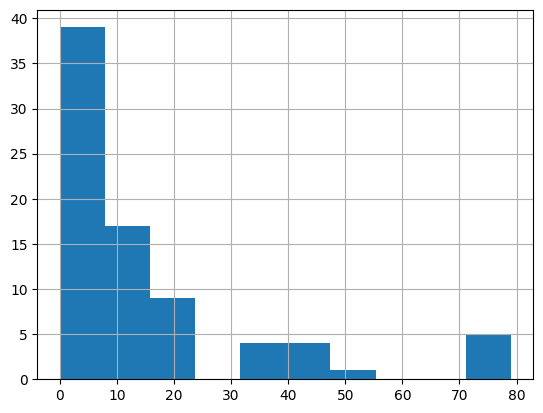

In [ ]:
missing_values.hist()

From above histrogram, most missing value columns have 0-40 percent, so we further watch their distribution by boxplot and histogram.

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go # Import go from plotly.graph_objects

def bp(df):
  # Create boxplot with traces
  traces = []
  for col in df.columns:
      traces.append(
          go.Box(
              y= df[col],
              name=col,
              boxmean=True,  # Show box mean
              marker=dict(color="lightblue")  # Optional customization
          )
      )

  # Create the layout
  layout = go.Layout(
      title="Boxplot of Features",
      xaxis_title="Features",
      yaxis_title="Value"
  )

  # Create the figure
  fig = go.Figure(data=traces, layout=layout)

  # Display the plot
  fig.show()

df.reset_index(drop=True,inplace=True)
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1990,AFG,10694804.0,1.306598e+10,0.046,0.004,2.024,-0.741,-26.784,2.213,-1.495,-40.312,0.207,0.169,0.070,0.189,0.155,0.064,0.278,0.026,NaN,NaN,NaN,1.537,58.603,355.083,11.510,5.710,10.814,807.556,29.032,NaN,2968.316,2.430,0.026,0.002,0.403,0.038,1.087,0.864,0.189,0.018,6.74,0.630,2.84,0.266,1.271,0.119,NaN,NaN,31.746,0.009,0.009,0.008,0.003,0.013,0.007,0.025,0.003,0.070,0.014,0.127,0.011,NaN,0.010,0.011,0.004,0.014,NaN,0.093,0.0,0.0,0.001,0.0,9.24,11.63,NaN,NaN
1,Afghanistan,1991,AFG,10745168.0,1.204736e+10,0.046,0.004,1.914,-0.110,-5.435,1.938,-0.276,-12.451,0.180,0.161,0.139,0.178,0.159,0.138,0.250,0.023,NaN,NaN,NaN,1.582,60.518,357.021,11.760,5.736,11.203,807.579,30.237,NaN,1293.862,1.154,0.026,0.002,0.389,0.036,1.107,0.885,0.023,0.002,7.02,0.653,2.93,0.273,1.204,0.112,NaN,NaN,13.903,0.009,0.008,0.007,0.003,0.012,0.007,0.024,0.003,0.068,0.013,0.126,0.011,NaN,0.009,0.010,0.000,0.012,NaN,0.091,0.0,0.0,0.001,0.0,9.51,11.90,NaN,NaN
2,Afghanistan,1992,AFG,12057436.0,1.267754e+10,0.046,0.004,1.482,-0.432,-22.580,-0.158,-2.095,-108.141,-0.013,-0.012,-0.017,0.123,0.117,0.162,0.022,0.002,NaN,NaN,NaN,1.628,62.000,356.863,11.782,5.758,11.566,805.939,31.266,NaN,760.342,0.723,0.022,0.002,0.363,0.030,0.958,0.760,-1.640,-0.136,7.12,0.591,2.89,0.240,1.030,0.085,NaN,NaN,9.168,0.009,0.007,-0.001,0.000,0.012,0.007,0.024,0.003,0.066,0.013,0.125,0.011,NaN,0.009,0.009,-0.031,0.011,NaN,0.090,0.0,0.0,0.001,0.0,9.16,11.55,NaN,NaN
3,Afghanistan,1993,AFG,14003764.0,9.834581e+09,0.047,0.003,1.487,0.005,0.330,-2.557,-2.399,1520.968,-0.183,-0.260,-0.281,0.106,0.151,0.163,0.018,0.001,NaN,NaN,NaN,1.675,63.487,354.306,11.800,5.780,11.918,801.895,32.314,NaN,650.207,0.926,0.022,0.002,0.352,0.025,0.834,0.663,-4.044,-0.289,7.21,0.515,2.93,0.209,1.048,0.075,NaN,NaN,9.105,0.009,0.007,-0.009,0.000,0.012,0.007,0.023,0.003,0.065,0.013,0.123,0.011,NaN,0.009,0.009,-0.079,0.011,NaN,0.088,0.0,0.0,0.001,0.0,9.29,11.68,NaN,NaN
4,Afghanistan,1994,AFG,15455560.0,7.919857e+09,0.047,0.003,1.454,-0.033,-2.227,-2.162,0.395,-15.450,-0.140,-0.273,-0.245,0.094,0.184,0.165,0.015,0.001,NaN,NaN,NaN,1.722,64.941,352.144,11.815,5.802,12.256,798.280,33.346,NaN,570.403,1.113,0.022,0.001,0.338,0.022,0.759,0.604,-3.616,-0.234,7.46,0.483,2.76,0.179,1.032,0.067,NaN,NaN,8.816,0.008,0.006,-0.008,0.000,0.012,0.007,0.023,0.003,0.063,0.013,0.

In [ ]:
bp(df[filter_df].iloc[:,3:].select_dtypes(include=[np.number]).drop(['primary_energy_consumption'], axis=1))

In [ ]:
a = continent_df[filter_df].drop(['primary_energy_consumption'], axis=1)
bp(a.iloc[:,3:].select_dtypes(include=[np.number]))

Seem our feature has right skew distribution

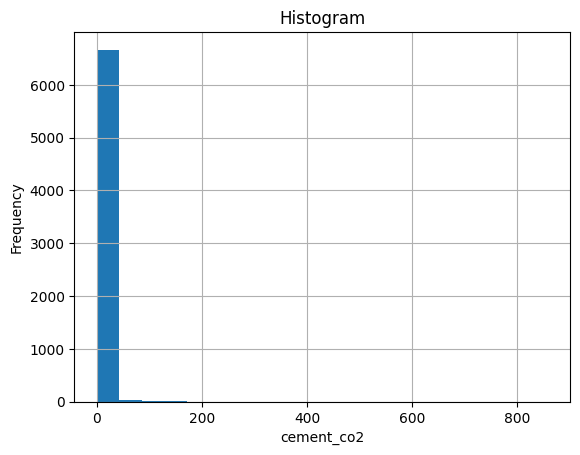

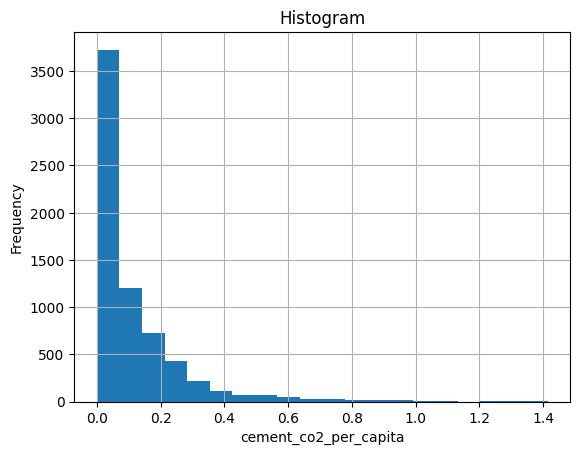

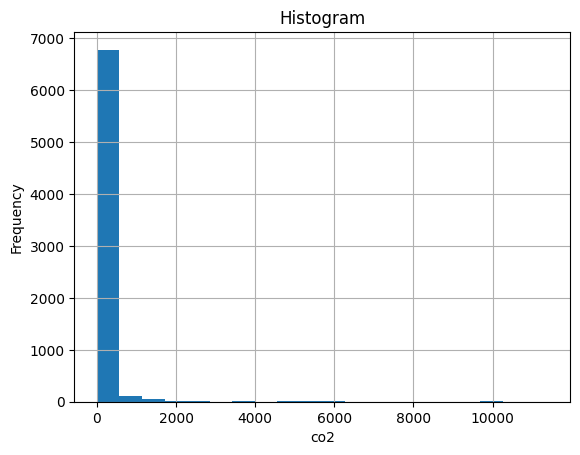

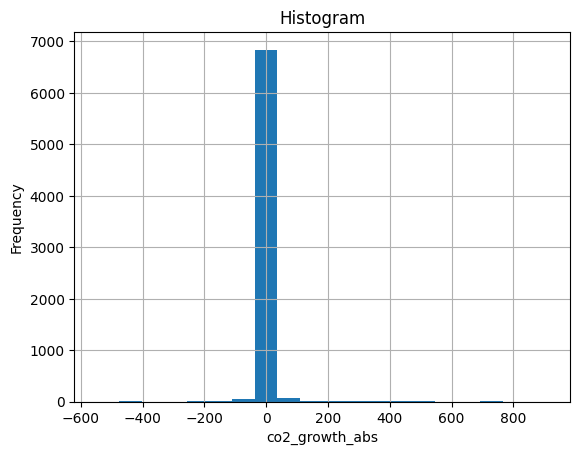

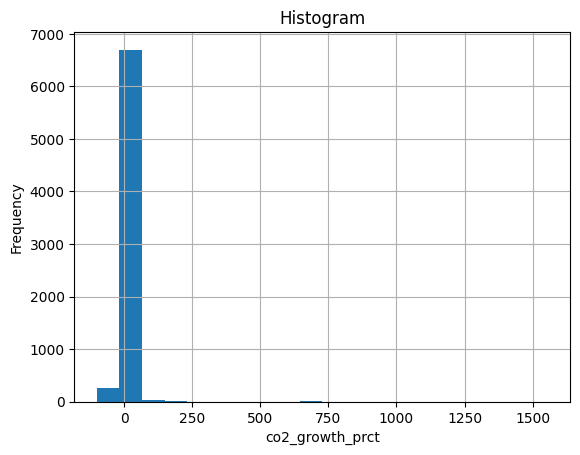

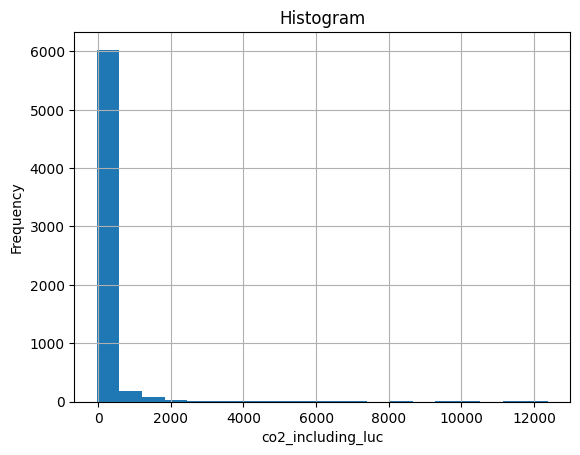

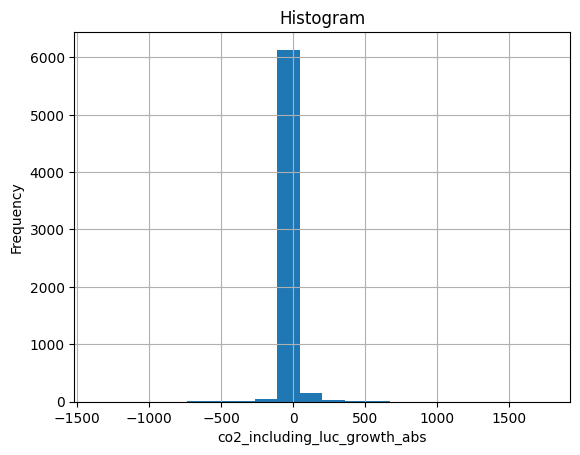

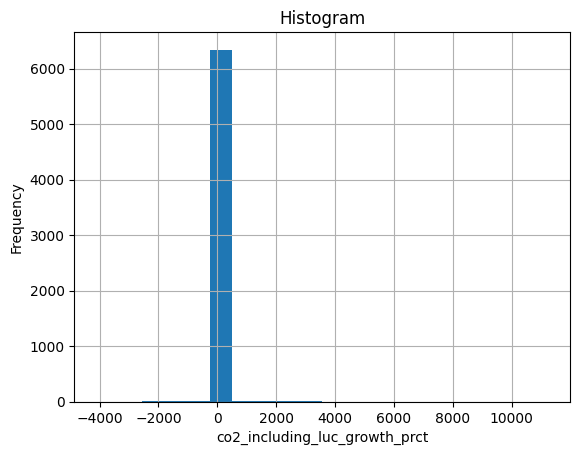

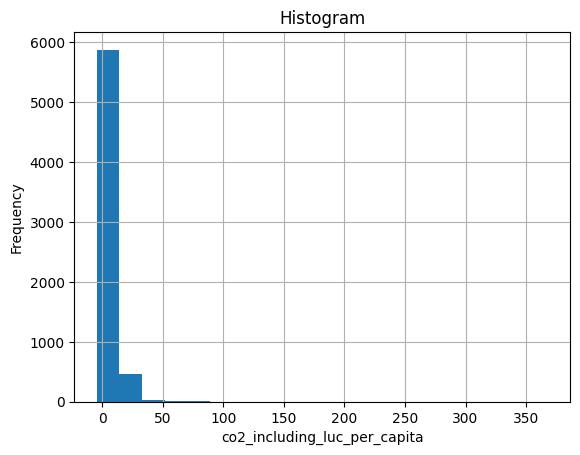

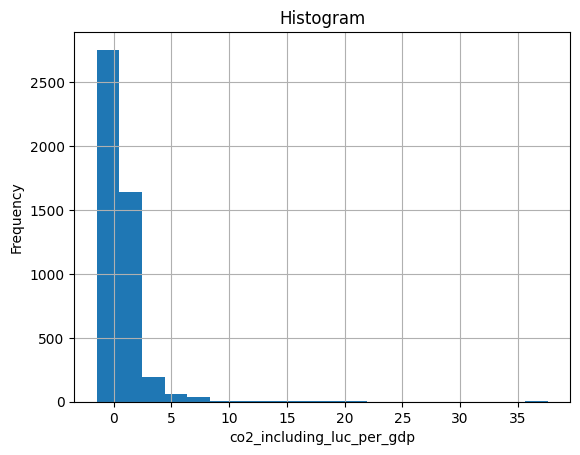

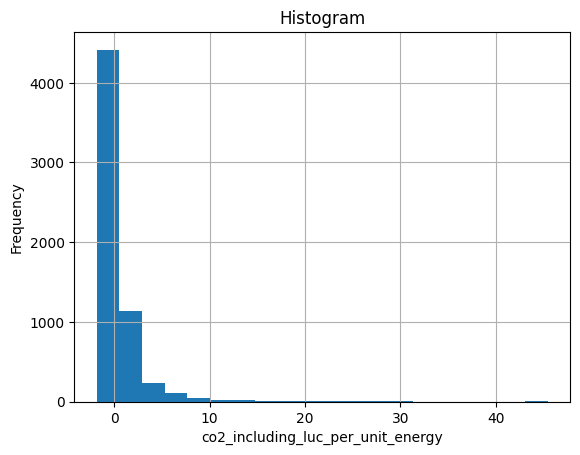

In [ ]:
for i in df.iloc[:,5:16].columns :
  df[i].hist(bins=20)

  # add labels and title
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title('Histogram')
  plt.show()

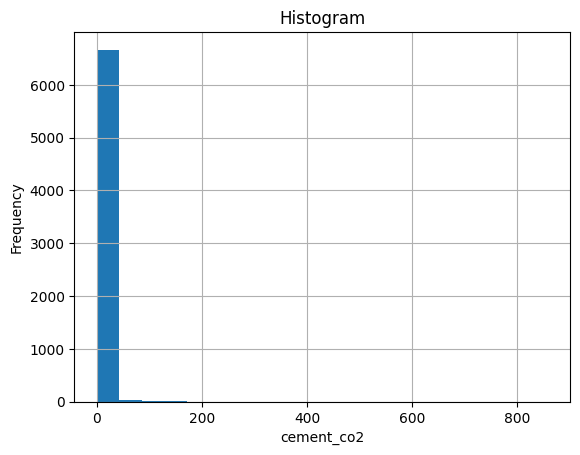

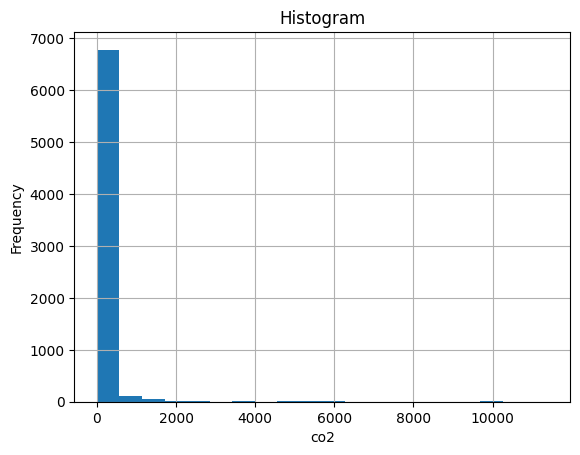

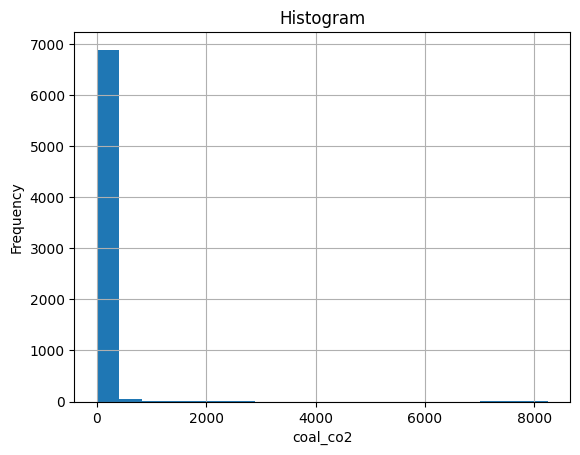

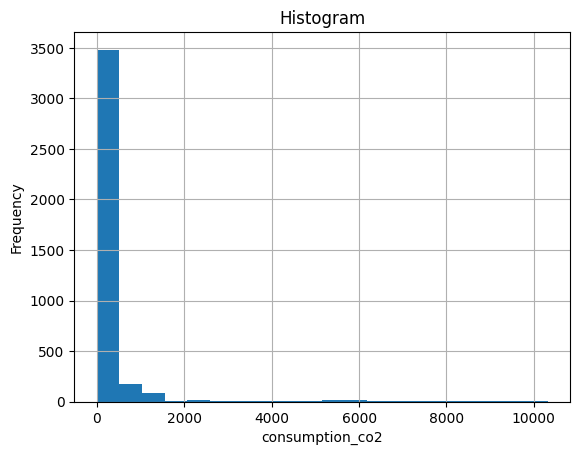

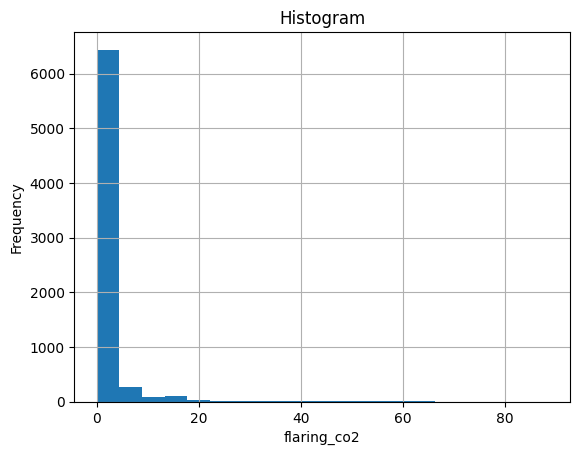

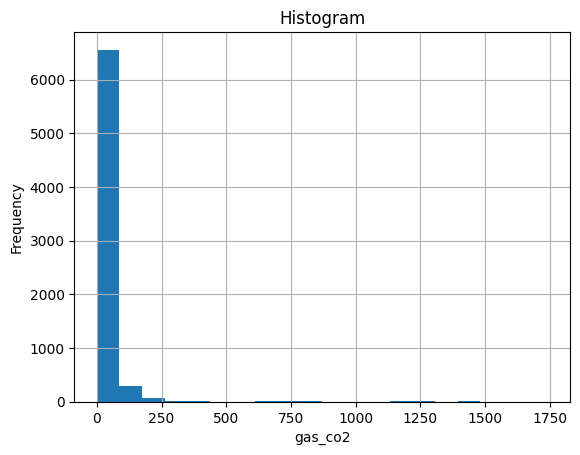

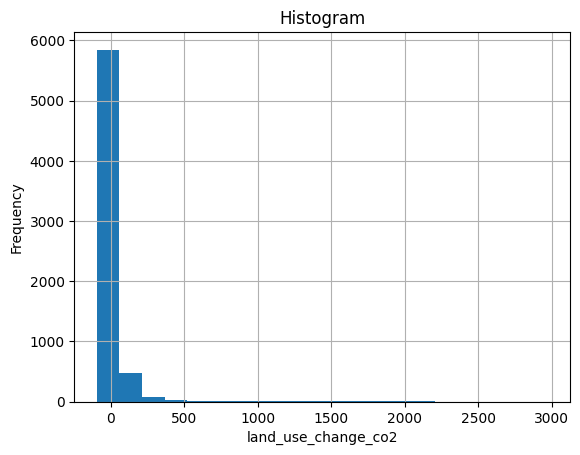

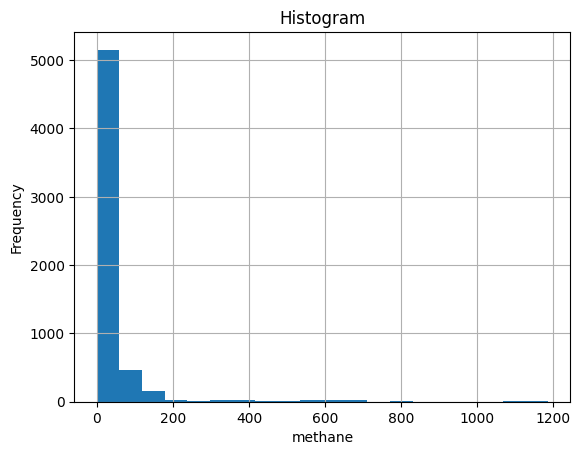

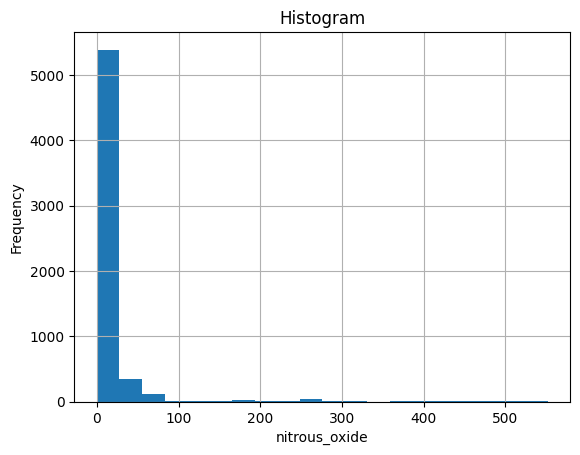

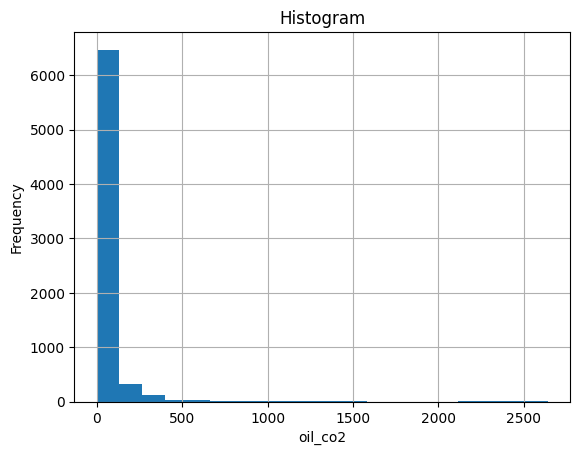

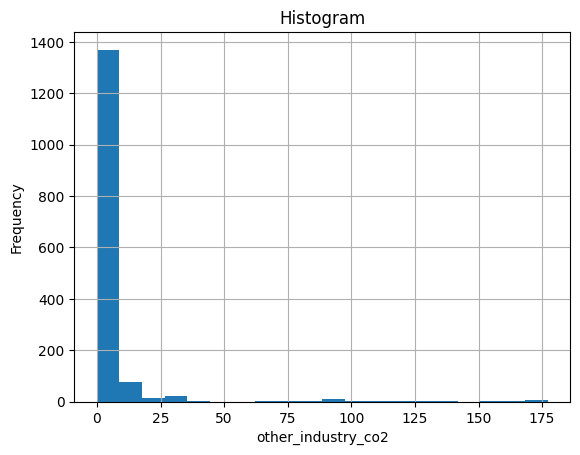

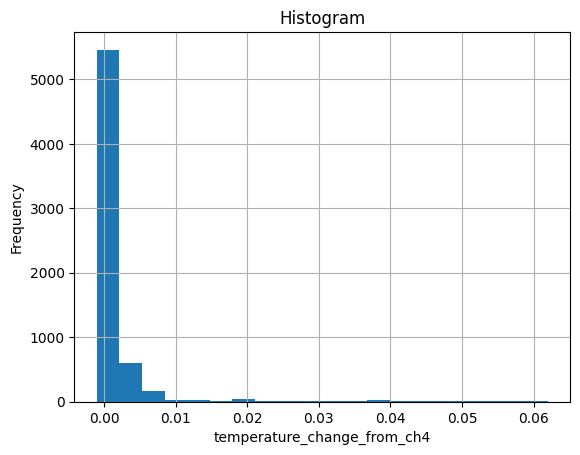

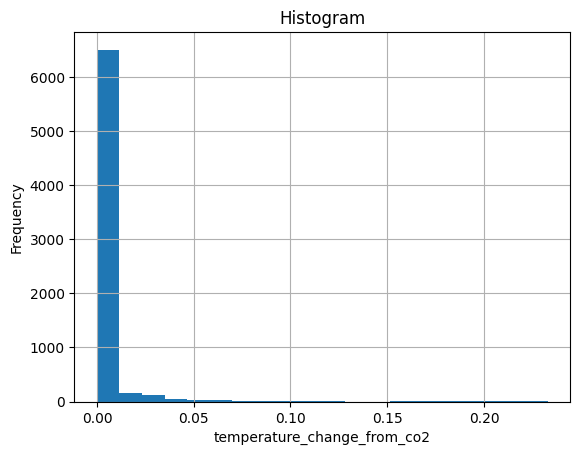

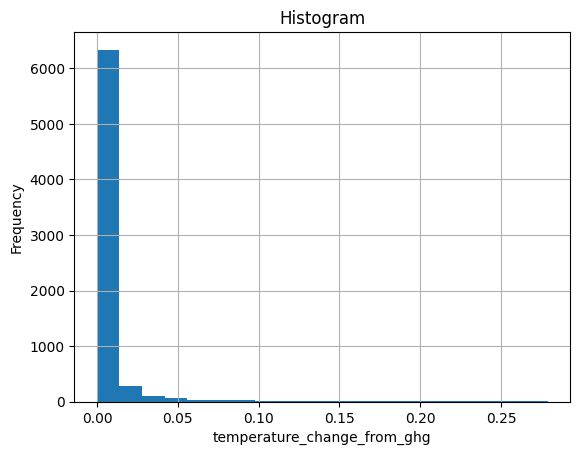

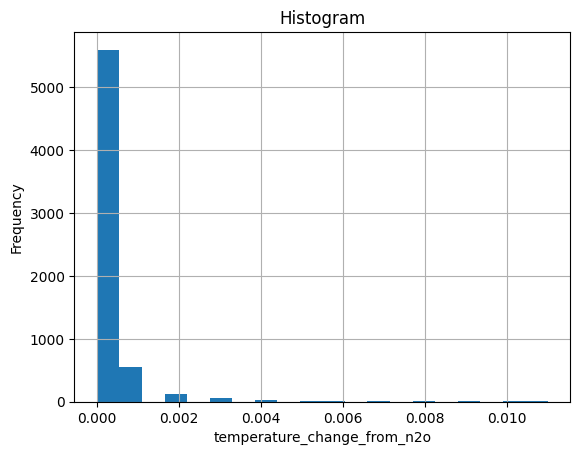

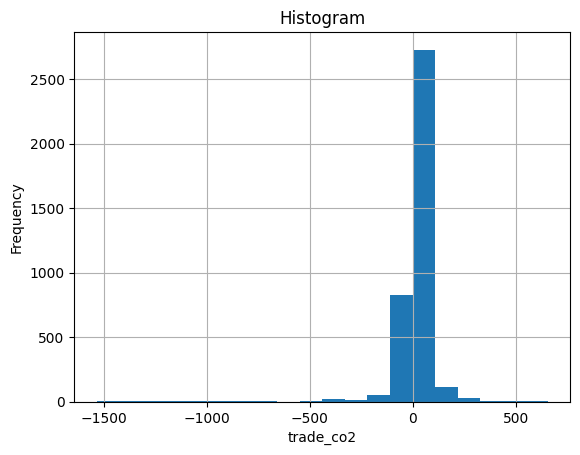

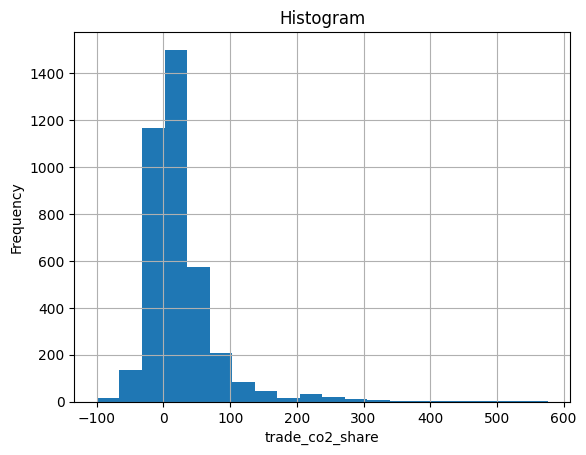

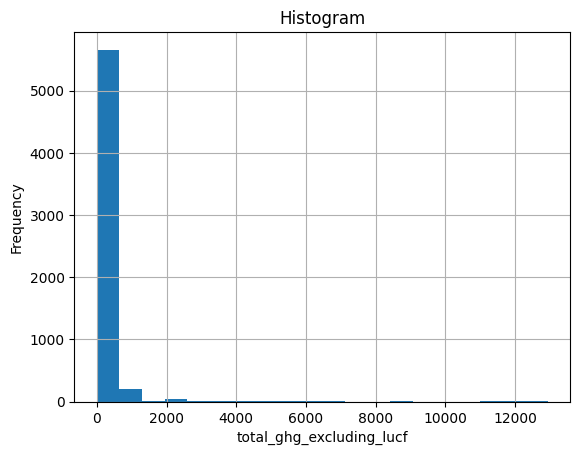

In [ ]:
for i in a.iloc[:,3:].select_dtypes(include=[np.number]).columns :
  df[i].hist(bins=20)

  # add labels and title
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title('Histogram')
  plt.show()

All columns are right skew distribution, so we decided to fill na value with median which are robust to outlier more than mean.

In [ ]:
df = df.fillna(df.median())
continent_df = continent_df.fillna(df.median())

<ipython-input-23-93dac8465551>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-23-93dac8465551>:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
#top 10 country emit ghg
a = df.groupby('country')['total_ghg'].sum().sort_values(ascending = False).head(5).to_frame().reset_index()
a.columns =['Country', 'Total green house gas emission (millions tonnes)']
# Create the table
table = go.Table(
    header=dict(
        values=list(a.columns),  # Extract column names
        align="center",
        font=dict(color="darkblue", size=12)
    ),
    cells=dict(
        values=[a[col] for col in a.columns],  # Extract cell values
        align="center",
        font=dict(color="black", size=10)
    )
)

# Create the figure
fig = go.Figure(data=[table])

# Display the plot
fig.show()

In [ ]:
#top 10 country emit ghg_per_capita
a = df.groupby('country')['ghg_per_capita'].sum().sort_values(ascending = False).head(10).to_frame().reset_index()
a.columns =['Country', 'Total green house gas emission per capita (tonnes per person)']
# Create the table
table = go.Table(
    header=dict(
        values=list(a.columns),  # Extract column names
        align="center",
        font=dict(color="darkblue", size=12)
    ),
    cells=dict(
        values=[a[col] for col in a.columns],  # Extract cell values
        align="center",
        font=dict(color="black", size=10)
    )
)

# Create the figure
fig = go.Figure(data=[table])

# Display the plot
fig.show()

In [ ]:
a = df.groupby('country')['ghg_per_capita'].sum().sort_values(ascending = False).to_frame().reset_index()
a[a['country'] == 'Thailand']

,country,ghg_per_capita
130,Thailand,156.139


## Which feature affect green house gas emission?
So we conduct correlation using spearman not pearson in order of right skew distribution we have 2 approach to select feature\
- Threshold-based Selection
- Hypothesis testing

In [ ]:
# Calculate correlation matrix (exclude rows/columns with missing values)
import numpy as np

corr_matrix = df.select_dtypes(include=[np.number]).corr(method='spearman')  # Use Spearman's rank correlation for non-normal data

Too many features can plot in heatmap so we only select correlation more than 0.7 or less than -0.7 as potential strong correlation (Threshold-based Selection)

In [ ]:
corr_matrix[abs(corr_matrix) > 0.7]['total_ghg'].sort_values(ascending = False)

total_ghg                                    1.000000
total_ghg_excluding_lucf                     0.946350
methane                                      0.919039
nitrous_oxide                                0.880668
co2_including_luc                            0.880200
share_global_co2_including_luc               0.875294
cumulative_co2_including_luc                 0.846390
share_global_cumulative_co2_including_luc    0.846059
temperature_change_from_ghg                  0.827682
share_of_temperature_change_from_ghg         0.819899
temperature_change_from_co2                  0.778194
temperature_change_from_ch4                  0.775785
co2                                          0.750566
share_global_co2                             0.749998
oil_co2                                      0.746527
share_global_oil_co2                         0.745937
primary_energy_consumption                   0.736368
population                                   0.726104
share_global_cumulative_co2 

In [ ]:
cor = continent_df.select_dtypes(include=[np.number]).corr(method='spearman')
cor[abs(cor) > 0.7]['total_ghg'].sort_values(ascending = False)

total_ghg                                    1.000000
total_ghg_excluding_lucf                     0.999644
nitrous_oxide                                0.997334
methane                                      0.996803
primary_energy_consumption                   0.942361
population                                   0.923752
share_global_cumulative_luc_co2              0.788938
cumulative_luc_co2                           0.784243
share_global_co2_including_luc               0.782706
co2_including_luc                            0.781747
share_global_flaring_co2                     0.767178
share_global_cumulative_flaring_co2          0.765099
share_global_coal_co2                        0.764424
share_global_cumulative_co2_including_luc    0.763864
flaring_co2                                  0.760663
cumulative_co2_including_luc                 0.757798
cumulative_flaring_co2                       0.756619
coal_co2                                     0.746084
share_global_cement_co2     

In [ ]:
corr_matrix = df.select_dtypes(include=[np.number]).corr(method='spearman')
corr_matrix[abs(corr_matrix) > 0.7]['temperature_change_from_ghg'].sort_values(ascending = False)

temperature_change_from_ghg                  1.000000
share_of_temperature_change_from_ghg         0.966563
temperature_change_from_co2                  0.923043
temperature_change_from_ch4                  0.860434
cumulative_co2_including_luc                 0.854108
share_global_cumulative_co2_including_luc    0.851789
population                                   0.850157
total_ghg_excluding_lucf                     0.829338
total_ghg                                    0.827682
co2_including_luc                            0.815696
methane                                      0.814974
co2                                          0.810014
share_global_co2_including_luc               0.809973
share_global_co2                             0.808001
oil_co2                                      0.799273
nitrous_oxide                                0.798456
share_global_oil_co2                         0.798130
cumulative_co2                               0.794887
share_global_cumulative_co2 

In [ ]:
cor = continent_df.select_dtypes(include=[np.number]).corr(method='spearman')
cor[abs(cor) > 0.7]['temperature_change_from_ghg'].sort_values(ascending = False)

temperature_change_from_ghg                  1.000000
temperature_change_from_co2                  0.998933
share_of_temperature_change_from_ghg         0.995016
temperature_change_from_n2o                  0.934117
temperature_change_from_ch4                  0.927391
co2_including_luc                            0.823892
share_global_cumulative_co2_including_luc    0.823765
share_global_co2_including_luc               0.822819
cumulative_co2_including_luc                 0.822481
share_global_flaring_co2                     0.814355
flaring_co2                                  0.813676
share_global_cumulative_gas_co2              0.812455
share_global_cumulative_luc_co2              0.810313
cumulative_luc_co2                           0.810262
share_global_cumulative_flaring_co2          0.809218
cumulative_flaring_co2                       0.808284
share_global_coal_co2                        0.805741
share_global_cumulative_co2                  0.803183
cumulative_co2              

In [ ]:

corr_matrix = df.select_dtypes(include=[np.number]).corr(method='spearman')
corr_matrix[abs(corr_matrix) > 0.7]['co2_including_luc'].sort_values(ascending = False)

co2_including_luc                            1.000000
share_global_co2_including_luc               0.996502
share_global_cumulative_co2_including_luc    0.909332
cumulative_co2_including_luc                 0.908062
total_ghg                                    0.880200
total_ghg_excluding_lucf                     0.878234
methane                                      0.819789
temperature_change_from_ghg                  0.815696
share_of_temperature_change_from_ghg         0.814666
temperature_change_from_co2                  0.802260
share_global_co2                             0.798125
co2                                          0.797011
share_global_oil_co2                         0.791899
oil_co2                                      0.790845
nitrous_oxide                                0.784667
primary_energy_consumption                   0.776443
share_global_cumulative_co2                  0.774618
share_global_cumulative_oil_co2              0.770309
cumulative_co2              

Use hypothesis testing to select correlation feature using spearman rank and non-parametric test

In [ ]:
from scipy.stats import spearmanr  # Assuming you're using Spearman's rank

# Loop through features and perform hypothesis testing
for feature in df.select_dtypes(include=[np.number]).columns:
    if feature == 'total_ghg_excluding_lucf':  # Skip the target variable (if applicable)
        continue
    corr, pval = spearmanr(df[feature], df['total_ghg_excluding_lucf'])  # Replace 'target' with your target variable
    if pval < 0.05:  # Adjust significance level as needed (e.g., 0.01)
        print(f"Feature: {feature}, Correlation: {corr:.2f}, p-value: {pval:.4f} (Significant)")

Feature: year, Correlation: 0.06, p-value: 0.0000 (Significant)
Feature: population, Correlation: 0.72, p-value: 0.0000 (Significant)
Feature: gdp, Correlation: 0.71, p-value: 0.0000 (Significant)
Feature: cement_co2, Correlation: 0.77, p-value: 0.0000 (Significant)
Feature: cement_co2_per_capita, Correlation: 0.56, p-value: 0.0000 (Significant)
Feature: co2, Correlation: 0.82, p-value: 0.0000 (Significant)
Feature: co2_growth_abs, Correlation: 0.17, p-value: 0.0000 (Significant)
Feature: co2_growth_prct, Correlation: -0.04, p-value: 0.0003 (Significant)
Feature: co2_including_luc, Correlation: 0.88, p-value: 0.0000 (Significant)
Feature: co2_including_luc_growth_abs, Correlation: 0.03, p-value: 0.0052 (Significant)
Feature: co2_including_luc_per_capita, Correlation: 0.34, p-value: 0.0000 (Significant)
Feature: co2_including_luc_per_unit_energy, Correlation: -0.04, p-value: 0.0005 (Significant)
Feature: co2_per_capita, Correlation: 0.35, p-value: 0.0000 (Significant)
Feature: co2_per_g

In [ ]:
# Loop through features and perform hypothesis testing
for feature in continent_df.select_dtypes(include=[np.number]).columns:
    if feature == 'total_ghg_excluding_lucf':  # Skip the target variable (if applicable)
        continue
    corr, pval = spearmanr(continent_df[feature], continent_df['total_ghg_excluding_lucf'])
    if pval < 0.05:  # Adjust significance level as needed (e.g., 0.01)
        print(f"Feature: {feature}, Correlation: {corr:.2f}, p-value: {pval:.4f} (Significant)")

Feature: population, Correlation: 0.92, p-value: 0.0000 (Significant)
Feature: gdp, Correlation: 0.15, p-value: 0.0000 (Significant)
Feature: cement_co2, Correlation: 0.74, p-value: 0.0000 (Significant)
Feature: cement_co2_per_capita, Correlation: 0.50, p-value: 0.0000 (Significant)
Feature: co2, Correlation: 0.46, p-value: 0.0000 (Significant)
Feature: co2_growth_abs, Correlation: 0.26, p-value: 0.0000 (Significant)
Feature: co2_growth_prct, Correlation: -0.08, p-value: 0.0030 (Significant)
Feature: co2_including_luc, Correlation: 0.78, p-value: 0.0000 (Significant)
Feature: co2_including_luc_growth_abs, Correlation: 0.12, p-value: 0.0000 (Significant)
Feature: co2_including_luc_growth_prct, Correlation: 0.11, p-value: 0.0001 (Significant)
Feature: co2_including_luc_per_capita, Correlation: 0.28, p-value: 0.0000 (Significant)
Feature: co2_including_luc_per_gdp, Correlation: 0.22, p-value: 0.0000 (Significant)
Feature: co2_including_luc_per_unit_energy, Correlation: 0.26, p-value: 0.00

#Visualize

## what source is the most share in emission?

###**Overall source of CO2 gas emission comes from**

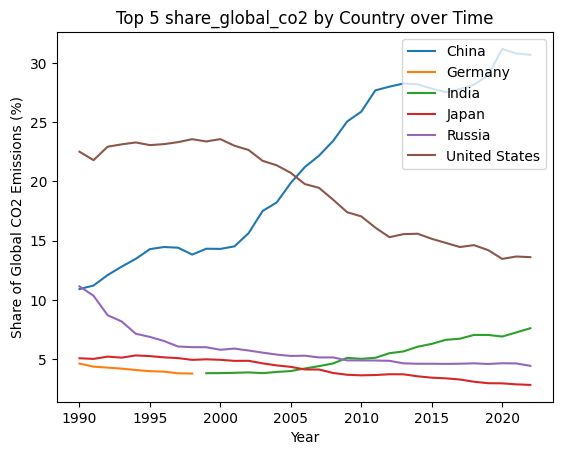

In [ ]:
def Top5_plot(df,x,y,z):
  df_pivoted = df.pivot(index=x, columns=z, values=y)

  # Extract the column names (countries)
  countries = list(df_pivoted.columns)

  # Create line plots for each country
  for country in countries:
      plt.plot(df_pivoted.index, df_pivoted[country], label=country)

  # Set labels and title
  plt.xlabel("Year")
  plt.ylabel("Share of Global CO2 Emissions (%)")
  plt.title("Top 5 {} by Country over Time".format(y))
  # Add legend and grid
  plt.legend()
  plt.grid(False)
  # Show the plot
  plt.show()

top_5_per_year = df[['country','year','share_global_co2']].groupby('year').apply(lambda x: x.nlargest(5, 'share_global_co2')).reset_index(drop=True)
Top5_plot(top_5_per_year,'year','share_global_co2','country')

In [ ]:
a=df[['country','year','ghg_per_capita']]
top_5_per_year = a[a['year'] <= 2020].groupby('year').apply(lambda x: x.nlargest(5, 'ghg_per_capita')).reset_index(drop=True)

fig = px.line(top_5_per_year, x='year', y='ghg_per_capita', color='country')

# Set the title
fig.update_layout(title="Top 5 green house gas per capita including land-use change and forestry countries Over Time")

# Get maximum x-values for each line
max_x = top_5_per_year.groupby('country')['year'].max()
countries = top_5_per_year["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = top_5_per_year[top_5_per_year['country'] == country]['ghg_per_capita'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="left",
            yanchor="top"
        )
    )

# Add annotations to the layout
fig.update_layout(annotations=annotations,
                  xaxis_title="Year",
                  yaxis_title="Total green house gas per capita (tonnes per person)")


# Display the plot
fig.show()

In [ ]:
a=df[['country','year','total_ghg']]
top_5_per_year = a[a['year'] <= 2020].groupby('year').apply(lambda x: x.nlargest(5, 'total_ghg')).reset_index(drop=True)

fig = px.line(top_5_per_year, x='year', y='total_ghg', color='country')

# Set the title
fig.update_layout(title="Top 5 Total green house gas including land-use change and forestry countries Over Time")

# Get maximum x-values for each line
max_x = top_5_per_year.groupby('country')['year'].max()
countries = top_5_per_year["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = top_5_per_year[top_5_per_year['country'] == country]['total_ghg'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="left",
            yanchor="top"
        )
    )

# Add annotations to the layout
fig.update_layout(annotations=annotations,
                  xaxis_title="Year",
                  yaxis_title="Total green house gas (tonnes per person)")


# Display the plot
fig.show()

In [ ]:
top_5_per_year = df[['country','year','share_global_co2']].groupby('year').apply(lambda x: x.nlargest(5, 'share_global_co2')).reset_index(drop=True)

fig = px.line(top_5_per_year, x='year', y='share_global_co2', color='country', symbol="country")

# Set the title
fig.update_layout(title="Top 5 CO2 Emitting Countries Over Time")

# Get maximum x-values for each line
max_x = top_5_per_year.groupby('country')['year'].max()
countries = top_5_per_year["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = top_5_per_year[top_5_per_year['country'] == country]['share_global_co2'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="right",
            yanchor="top"
        )
    )

# Add annotations to the layout
fig.update_layout(annotations=annotations)

# Display the plot
fig.show()

In [ ]:
df_ovall = df[['methane','nitrous_oxide','co2_including_luc']]
df_ovall_sum=df_ovall.sum(axis=0).to_frame().reset_index()

# Create the bar plot
fig = px.bar(df_ovall_sum.sort_values(by=[0],ascending =False), x='index', y=0, title='All Greehouse Gas emission around the world in Bar Plot')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Gas', yaxis_title='CO2 emission (million tonnes)')
fig.update_traces(marker_color='lightblue')  # Change bar color
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)

# Show the plot
fig.show()

In [ ]:
df_ovall = df[['cement_co2','oil_co2','gas_co2','flaring_co2','coal_co2','land_use_change_co2','other_industry_co2']]
df_ovall_sum=df_ovall.sum(axis=0).to_frame().reset_index()

# Create the bar plot
fig = px.bar(df_ovall_sum.sort_values(by=[0],ascending =False), x='index', y=0, title='CO2 emission from sources around the world')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Source', yaxis_title='CO2 emission (million tonnes)')
fig.update_traces(marker_color='lightblue')  # Change bar color

# Show the plot
fig.show()

In [ ]:
country = ['Thailand','China','Russia','United States','United Kingdom','India']
continent = ['World','China','Europe','Asia','Africa','South America','North America','Oceania']
wealth = ['High-income countries','Low-income countries','Lower-middle-income countries','Upper-middle-income countries']

In [ ]:
continent_grouped = continent_df[continent_df['country'].isin(continent)].groupby("country")['total_ghg_excluding_lucf'].sum().sort_values(ascending = False)
fig = go.Figure(
    data=[go.Bar(x=continent_grouped.index, y=continent_grouped.values, name="Green house gas Emissions")],
    layout=go.Layout(
        title="Green house gas Emissions by Continent",
        xaxis_title="Continent",
        yaxis_title="Green house gas Emissions (million tonnes)",
        barmode="group"  # Stack bars on top of each other
    )
)

# Display the chart
fig.show()

In [ ]:
df_grouped = df[df['country'].isin(country)].groupby("country")
df_grouped2 = df.groupby("country")

# Create traces (one line for each country)
def line_plot_country(df, x_feature, y_feature):
  traces = []
  for country, group_data in df:
      trace = go.Scatter(
          x=group_data[x_feature],
          y=group_data[y_feature],
          mode="lines",
          name=country
      )
      traces.append(trace)

  # Create the layout
  layout = go.Layout(
      title="Line plot of {} in each country by {}".format(y_feature, x_feature),
      xaxis_title=x_feature,
      yaxis_title=y_feature
  )

  # Create the figure and add traces
  fig = go.Figure(data=traces, layout=layout)
  # Display the plot
  fig.show()

line_plot_country(df_grouped,"year","oil_co2")

In [ ]:
line_plot_country(df_grouped,"year","coal_co2")

In [ ]:
line_plot_country(df_grouped,"year","cement_co2")

In [ ]:
line_plot_country(df_grouped,"year","flaring_co2")

In [ ]:
line_plot_country(df_grouped,"year","gas_co2")

In [ ]:
line_plot_country(df_grouped,"year","other_industry_co2")

## About Thailand

In [ ]:
df_ovall = df[df['country'] == 'Thailand'][['methane','nitrous_oxide','co2_including_luc']]

df_thai_sum = df_ovall.sum(axis=0).to_frame().reset_index()

# Create the bar plot
fig = px.bar(df_thai_sum.sort_values(by=[0],ascending =False), x='index', y=0, title='All Greehouse Gas emission in Thailand in Bar Plot')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Green house gas', yaxis_title='Carbon dioxide-equivalents (million tonnes)')
fig.update_traces(marker_color='lightblue')  # Change bar color

# Show the plot
fig.show()

In [ ]:
df_ovall = df[df['country'] == 'Thailand'][['cement_co2','oil_co2','gas_co2','flaring_co2','coal_co2','land_use_change_co2','other_industry_co2']]

df_thai_sum = df_ovall.sum(axis=0).to_frame().reset_index()

# Create the bar plot
fig = px.bar(df_thai_sum.sort_values(by=[0],ascending =False), x='index', y=0, title='CO2 emission from sources in Thailand in Bar Plot')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Source', yaxis_title='CO2 emission (million tonnes)')
fig.update_traces(marker_color='lightblue')  # Change bar color

# Show the plot
fig.show()

In [ ]:
thailand_data = df[df['country'] == 'Thailand']
features = ['cement_co2', 'oil_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'land_use_change_co2','other_industry_co2']

# Create line traces
traces = []
for feature in features:
    trace = go.Scatter(
        x=thailand_data['year'],
        y=thailand_data[feature],
        mode='lines',
        name=feature
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title=f"CO2 Emissions in Thailand by Source Over Time",
    xaxis_title='Year',
    yaxis_title='CO2 Emissions (Unit : millions tonnes)',  # Replace '...' with the appropriate unit
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Display the plot
fig.show()

In [ ]:
thailand_data = df[df['country'] == 'Thailand']
thailand_data = thailand_data[thailand_data['year']<=2021]
features = temp

# Create line traces
traces = []
for feature in features:
    trace = go.Scatter(
        x=thailand_data['year'],
        y=thailand_data[feature],
        mode='lines',
        name=feature
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title=f"Change in global mean surface temperature caused by green house gas in Thailand Over Time",
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',  # Replace '...' with the appropriate unit
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Display the plot
fig.show()

- Primary energy consumption - Measured in terawatt-hours.
- Consumption-based emissions attribute the emissions generated in the production of goods and services according to where they were consumed, rather than where they were produced.
The data is calculated by adjusting 'production-based' emissions (emissions produced domestically) for trade: Consumption-based emissions equals production-based emissions, minus emissions embedded in exports, plus emissions embedded in imports.

##**Consumption-based CO₂ emissions**
Consumption-based emissions include those from fossil fuels and industry. Land-use change emissions are not included. (fossil fuels and industry + trade co2)

In [ ]:
df_grouped = df[df['country'].isin(country)].groupby("country")
line_plot_country(df_grouped,"year","consumption_co2")

In [ ]:
df_grouped = df[df['country'].isin(country)].groupby("country")
line_plot_country(df_grouped,"year","consumption_co2_per_capita")

In [ ]:
df_grouped = df[df['country'].isin(country)].groupby("country")
line_plot_country(df_grouped,"year","consumption_co2_per_gdp")

## Temperature by year

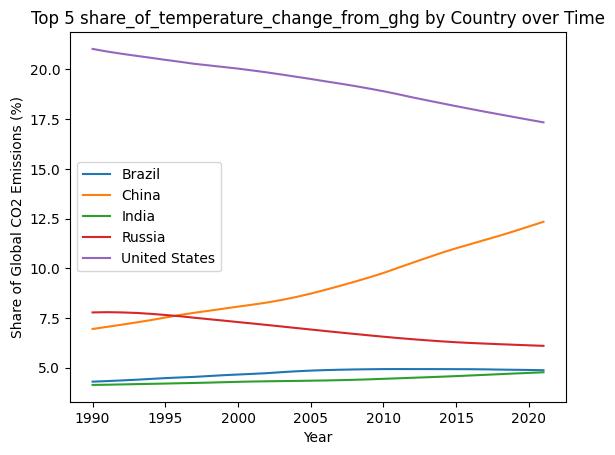

In [ ]:
a = df[['country','year','share_of_temperature_change_from_ghg']]
top_5_per_year = a[a['year'] <= 2021].groupby('year').apply(lambda x: x.nlargest(5, 'share_of_temperature_change_from_ghg')).reset_index(drop=True)
Top5_plot(top_5_per_year,'year','share_of_temperature_change_from_ghg','country')

In [ ]:
fig = px.line(top_5_per_year, x='year', y='share_of_temperature_change_from_ghg', color='country', symbol="country")

# Set the title
fig.update_layout(title="Top 5 temperature change from green house gas in percent Over Time")

# Get maximum x-values for each line
max_x = top_5_per_year.groupby('country')['year'].max()
countries = top_5_per_year["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = top_5_per_year[top_5_per_year['country'] == country]['share_of_temperature_change_from_ghg'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="right",
            yanchor="top"
        )
    )

# Add annotations to the layout
fig.update_layout(annotations=annotations)

# Display the plot
fig.show()

In [ ]:
c = continent_df[continent_df['country'].isin(continent)]
fig = px.line(c[c['year']<=2021], x='year', y='temperature_change_from_ghg', color='country')

fig.update_layout(title="Temperature change from green house gas Over Time by continent")

# Get maximum x-values for each line
max_x = c[c['year']<=2021].groupby('country')['year'].max()
countries = c[c['year']<=2021]["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = c[c['year']<=2021][c[c['year']<=2021]['country'] == country]['temperature_change_from_ghg'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="left",
            yanchor="top"
        )
    )
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="temperature change from green house gas (celcius)"
)
# Add annotations to the layout
fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
country = ['Thailand','China','Russia','United States','United Kingdom','India']
df_grouped = df[df['country'].isin(country)].groupby("country")
line_plot_country(df_grouped,"year","temperature_change_from_co2")

In [ ]:
df_grouped = continent_df[continent_df['country'].isin(continent)].groupby("country")
line_plot_country(df_grouped,"year","temperature_change_from_co2")

In [ ]:
c = continent_df[continent_df['country'].isin(continent)]
fig = px.line(c[c['year']<=2020], x='year', y='ghg_per_capita', color='country')

fig.update_layout(title="Total green house gas per capita include land use change Over Time by continent")

# Get maximum x-values for each line
max_x = c[c['year']<=2020].groupby('country')['year'].max()
countries = c[c['year']<=2020]["country"].unique()
# Create annotations with adjusted positions
annotations = []
for i, country in enumerate(countries):
    x_pos = max_x.loc[country] - 0.1  # Adjust offset for right-alignment
    y_pos = c[c['year']<=2020][c[c['year']<=2021]['country'] == country]['ghg_per_capita'].iloc[-1]
    annotations.append(
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=country,
            showarrow=False,
            font=dict(color=fig.data[i]["line"]["color"]),
            xanchor="left",
            yanchor="top"
        )
    )
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total green house gas per capita(tonnes per person)"
)
# Add annotations to the layout
fig.update_layout(annotations=annotations)

fig.show()

<ipython-input-61-2e77f5e50280>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df.shape

(7224, 79)

In [ ]:
continent_df.shape

(1312, 79)

In [ ]:
df.to_csv('country.csv', index=False)
continent_df.to_csv('continent.csv', index=False)